# Some Notes at beginning of Lab.

In [91]:
# Image Detection: detecting if the image contains a person or a specific object.
# Object Detection: detecting objects in an image and its position in the image.

# Camera Pinhole
# A small F stop larger pinhole.
# A large F stop smaller pinhole.

# Depth of Field is controlled using pinhole size that makes the background and frontground of the image appear sharp or blurry

# Color Space

In [92]:
# when we want to detect a color in an image, we will use the HSV color space model to detect the color.
# We cant use RGB or any other model. We can only use HSV because it allows us to see ranges of colors.
# We can say detect a red color which is from range (x to y) for example.

# Traffic Light Detection with HSV Color Model

# Pseudo Code:

1. Convert the image to hsv.
2. Specify the red range -> the upper bound and the lower bound.

( this is the range of the color "red" in the HSV model scale)
3. We need to find the range of the values in the image.
4. Print the mask.

In [93]:
import cv2    # CV stands for computer vision
import matplotlib.pyplot as plt
import numpy as np

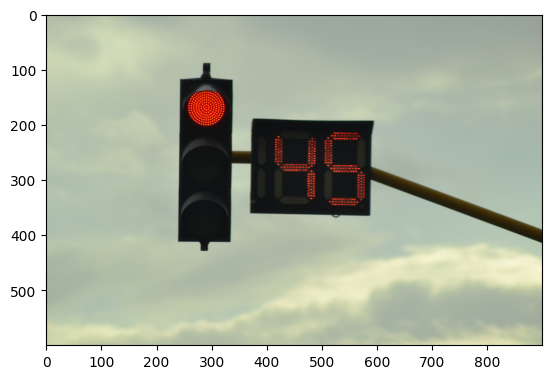

In [94]:
sign_img = cv2.imread('traffic_light.png')
sign_img_rgb = cv2.cvtColor(sign_img, cv2.COLOR_BGR2RGB)
plt.imshow(sign_img_rgb)

In [95]:
# Define lower and upper HSV ranges for red, green, and yellow.
# We define this range so that we can extract the "red" color only from the image.

# HSV = > ([color, saturation, Value])
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
# Hue:
# the color range is from 0 to 10, which is the red color that we see in the HSV color space diagram
# Saturation:
# we say that the saturation range is from 50 to 255. saturation is the gray level. how gray or saturated the color is.
# so, when saying 50 - 255, we are saying that we want to extarct red colors from the image that are eaither saturated between around 20% (50) 100% (255)\
# Value:



# Then we also do the same thing for this range which is also a range with red colors on the HSV color space diagram
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

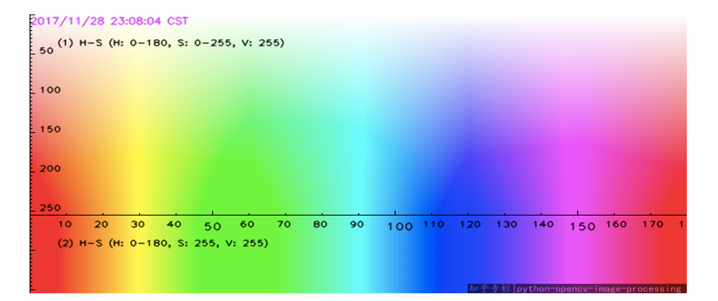

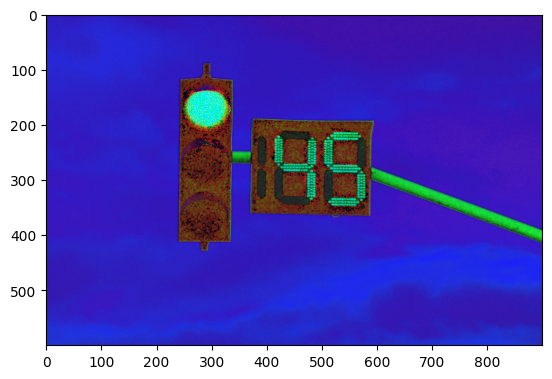

In [96]:
img_hsv = cv2.cvtColor(sign_img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [97]:
# Create Masks for red, green and yellow (traffic light colors)

# the mask is applied on the image: we extract all the colors that are between the range (lower_red1 and upper_red1)
mask_red1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(img_hsv, lower_red2, upper_red2)

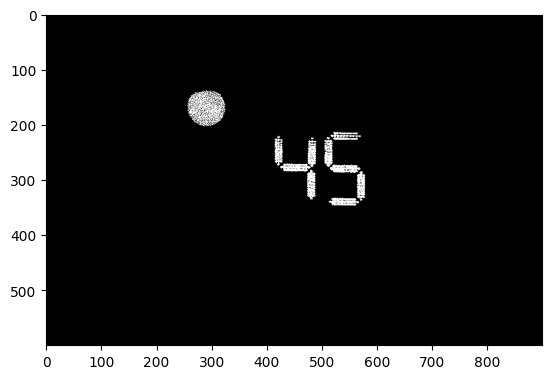

In [98]:
# this shows the colors in the image in the first range
plt.imshow(mask_red1, cmap='gray')

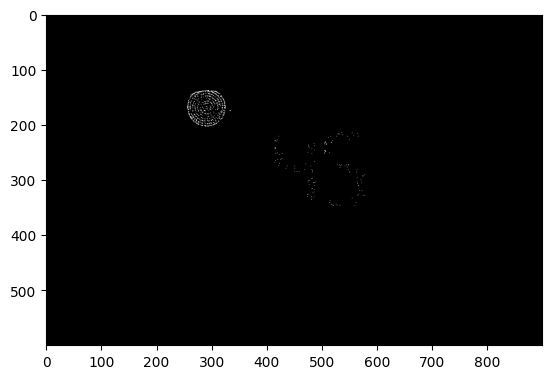

In [99]:
# this shows the colors in the image in the second range
plt.imshow(mask_red2, cmap='gray')

In [100]:
temp_img = sign_img_rgb

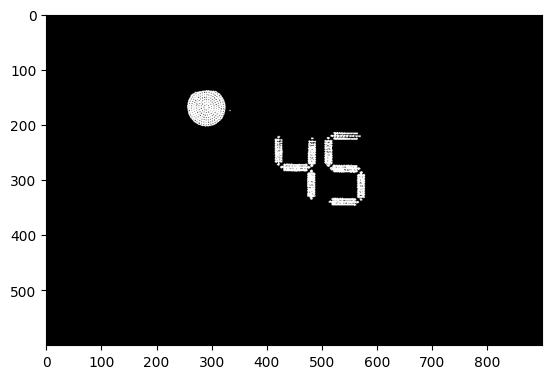

In [101]:
# Now we want to combine both masks so that we have both ranges:
mask_red_combined = mask_red1 + mask_red2
plt.imshow(mask_red_combined, cmap='gray')

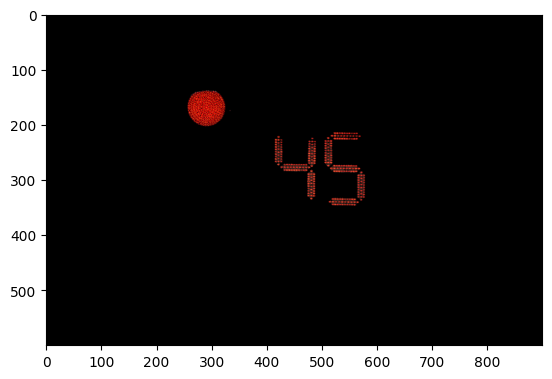

In [102]:
# Now, we used the created mask (the mask that extracts the red colors) on the original image to get the red color from the original image.
# So, we turned everything in the original image to black ( = 0 ) except the color "red"
temp_img[np.where(mask_red_combined == 0)] = 0      # 0 means black
plt.imshow(temp_img)

# Part 2

In [103]:
lower_green = np.array([45, 40, 40])
upper_green = np.array([55, 255, 255])

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

In [104]:
temp_img = sign_img_rgb

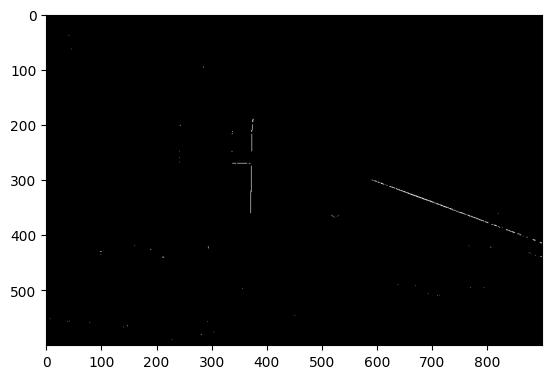

In [105]:
mask_green = cv2.inRange(img_hsv, lower_green, upper_green)
plt.imshow(mask_green, cmap='gray')

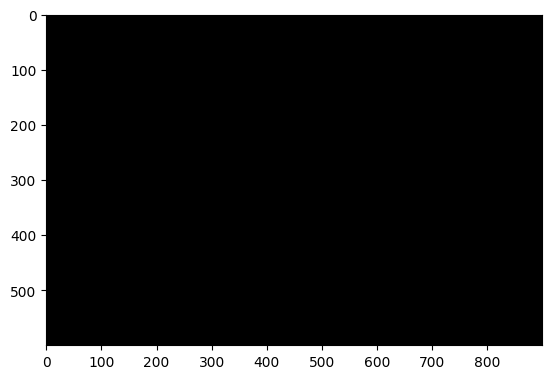

In [106]:
temp_img[np.where(mask_green == 0)] = 0      # 0 means black
plt.imshow(temp_img)

In [107]:
temp_img = sign_img_rgb

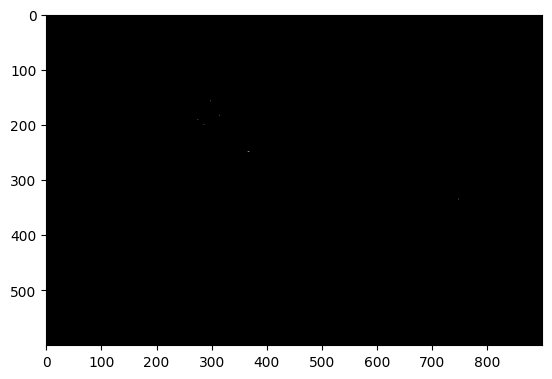

In [108]:
mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
plt.imshow(mask_yellow, cmap='gray')

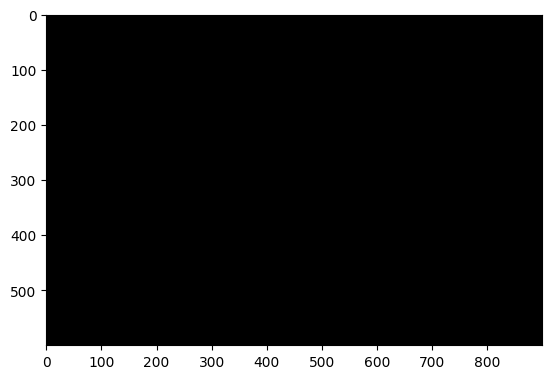

In [109]:
temp_img[np.where(mask_yellow == 0)] = 0      # 0 means black
plt.imshow(temp_img)

Caluclate the area of the red color

In [110]:
# Calculate the total area of each color
red_area = cv2.countNonZero(mask_red_combined)
green_area = cv2.countNonZero(mask_green)
yellow_area = cv2.countNonZero(mask_yellow)

print("Red Area "+str(red_area)+" Green Area "+
      str(green_area)+" Yellow Area "+
      str(yellow_area))

Red Area 8594 Green Area 586 Yellow Area 8


In [111]:
# Determine the dominant color
if red_area > green_area and red_area > yellow_area:
  print("Traffic light is RED")
elif green_area > red_area and green_area > yellow_area:
  print("Traffic light is GREEN")
elif yellow_area > red_area and yellow_area > green_area:
  print("Traffic light is YELLOW")
else:
  print("Unable to determine the color")

Traffic light is RED


# Part3

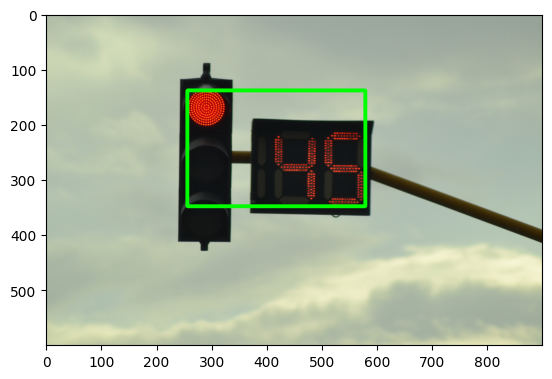

In [112]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

img =cv2.imread('traffic_light.png')
red = [0, 0, 255]  # red in BGR colorspace


# Convert BGR to HSV
hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Convert BGR to RGB
rgbImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a mask that extracts the red colors in the image  (using the HSV converted image and the HSV color space)
mask = cv2.inRange(hsvImage, lower_red1, upper_red1)



# The line mask_ = Image.fromarray(mask) converts a NumPy array (mask)
# representing an image mask into a PIL (Python Imaging Library) image object.

# By using this line, the code converts the mask image from the OpenCV format (a NumPy array)
# to a PIL image format. PIL provides various functions for image manipulation and processing,
# so converting the mask to a PIL image enables you to use PIL's functionalities on the mask, such as saving,
# displaying, or further processing it using PIL's image processing capabilities.

# So it's the same mask that we created previosuly but is a different format or something
mask_ = Image.fromarray(mask)




# A bounding box (bbox) is a rectangular region that encloses a specific object or area within an image
# getbbox() simply retrieves the bounding box of the non-zero (or non-black) region in the mask image.
# This bounding box represents the area within the mask where the pixel values are not equal to zero,
bbox = mask_.getbbox()


# If a bounding box is found (bbox is not None),
# it draws a rectangle around the detected area on the RGB image (rgbImage) using cv2.rectangle().
# The rectangle is drawn with a green color and a thickness of 5 pixels.
if bbox is not None:
  x1, y1, x2, y2 = bbox
  frame = cv2.rectangle(rgbImage, (x1, y1), (x2, y2), (0, 255, 0), 5)


plt.imshow(frame)